# BPM alignement T8

## Quadrupole scan in T8 to see the misalignement of the beam

In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [116]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import glob
import json
import pybt
from pybt.tools.parsers import read_twiss_file
from pybt.myjson.encoder import myJSONDecoder
from os import walk
import skimage
from skimage import filters
from scipy import integrate
from matplotlib.pyplot import cm
import pickle
from scipy.optimize import curve_fit

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

In [180]:
start_path = "/eos/user/e/eljohnso/SWAN_projects/quad-scan-east/quad_scan_t8_proton_data/"
end_path = "bpm_alignement_data/"
mypath = start_path+end_path

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    print(dirnames)
    break


dirname = dirnames[1]
print("")
print (dirname)
infile = open(dirname+"/"+dirname+".p", 'rb')
loaded_pickle = pickle.load(infile)

['.sys.v#.bpm_alignement_t8.ipynb', 'quad_scan_t8_proton_2022_11_16_13h07m48s', 'quad_scan_t8_proton_2022_11_16_13h19m01s', 'quad_scan_t8_proton_2022_11_16_13h27m54s', 'quad_scan_t8_proton_2022_11_16_13h31m34s', 'quad_scan_t8_proton_2022_11_16_13h46m55s', 'quad_scan_t8_proton_2022_11_16_13h52m54s']

quad_scan_t8_proton_2022_11_16_13h07m48s


In [181]:
df = pd.DataFrame()

# F61
for key in list(loaded_pickle[2].keys()):
    k1_list = []
    for i in range (len(loaded_pickle[2][key])):
        k1 = loaded_pickle[2][key][i][0][1][0]
        k1_list.append(k1)
        
    d = {key: k1_list}
    df_inter = pd.DataFrame(data=d)
    df = pd.concat([df,df_inter],axis=1)

# T8
for key in list(loaded_pickle[6].keys()):
    k1_list = []
    for i in range (len(loaded_pickle[6][key])):
        k1 = loaded_pickle[6][key][i][0][1][0]
        k1_list.append(k1)
        
    d = {key: k1_list}
    df_inter = pd.DataFrame(data=d)
    df = pd.concat([df,df_inter],axis=1)

# T8
for key in list(loaded_pickle[7].keys()):
    HCenter_list = []
    VCenter_list = []
    for i in range (len(loaded_pickle[7][key])):
        HCenter = loaded_pickle[7][key][i]["HCenter"]
        HCenter_list.append(HCenter)
        VCenter = loaded_pickle[7][key][i]["VCenter"]
        VCenter_list.append(VCenter)
        
    d = {key+"_HCenter": HCenter_list, key+"_VCenter": VCenter_list}
    df_inter = pd.DataFrame(data=d)
    df = pd.concat([df,df_inter],axis=1)
    
    
# MWPC
HCenter_list = []
VCenter_list = []
key = "PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"
for i in range (len(loaded_pickle[11][key])):
    print(loaded_pickle[11][key][i])
    HCenter = loaded_pickle[11][key][i]["HCenter"]
    HCenter_list.append(HCenter)
    VCenter = loaded_pickle[11][key][i]["VCenter"]
    VCenter_list.append(VCenter)
    
d = {key+"_HCenter": HCenter_list, key+"_VCenter": VCenter_list}
df_inter = pd.DataFrame(data=d)
df = pd.concat([df,df_inter],axis=1)

df.head(1)

{'HSigma': 18.854883978142436, 'VCenter': -31.583704579755576, 'HCenter': -1.3071681903661474, 'VSigma': 17.099158363433222, 'DeviceName': 'T08.XWCM103'}
{'HSigma': 11.366695971387372, 'VCenter': -2.227563746811006, 'HCenter': -0.5076694156488779, 'VSigma': 16.730377037706752, 'DeviceName': 'T08.XWCM103'}
{'HSigma': 10.455476049983643, 'VCenter': -3.3578720945749287, 'HCenter': -1.0503698099207486, 'VSigma': 14.063501001491282, 'DeviceName': 'T08.XWCM103'}
{'HSigma': 9.563492323466017, 'VCenter': -4.5094391140854535, 'HCenter': -1.3902883500677512, 'VSigma': 11.555745531807325, 'DeviceName': 'T08.XWCM103'}
{'HSigma': 8.671762037646678, 'VCenter': -5.689262768387526, 'HCenter': -1.6712803045997697, 'VSigma': 9.59935375351629, 'DeviceName': 'T08.XWCM103'}
{'HSigma': 7.775627804474811, 'VCenter': -6.901701222587005, 'HCenter': -2.0644905933462794, 'VSigma': 8.008111520844356, 'DeviceName': 'T08.XWCM103'}
{'HSigma': 7.139656835584887, 'VCenter': -8.074738870023523, 'HCenter': -2.6684626592

logical.F61.QFN01/K_FUNC_LIST#value  logical.F61.QDN02/K_FUNC_LIST#value  \
0                              0.47969                             -0.17299   

   logical.F61.QFN03/K_FUNC_LIST#value  logical.F61.QDN04/K_FUNC_LIST#value  \
0                              0.06903                             -0.09035   

   logical.T8.QFN05/K_FUNC_LIST#value  logical.T8.QDN06/K_FUNC_LIST#value  \
0                               0.196                             -0.1946   

   logical.T8.QDN07/K_FUNC_LIST#value  logical.T8.QFN08/K_FUNC_LIST#value  \
0                           -0.061403                            0.069031   

   PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_HCenter  \
0                                        0.065593   

   PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_VCenter  \
0                                        0.031523   

   PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions_HCenter  \
0                                       15.055749   

   PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions_VCenter  \
0                                        3.587897   

   PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions_HCenter  \
0                                       -2.623949   

   PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions_VCenter  \
0                                       -3.314966   

   PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions_HCenter  \
0                                       -1.918767   

   PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions_VCenter  \
0                                      -15.655966   

   PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions_HCenter  \
0                                          -1.307168      

   PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions_VCenter  
0                                         -31.583705

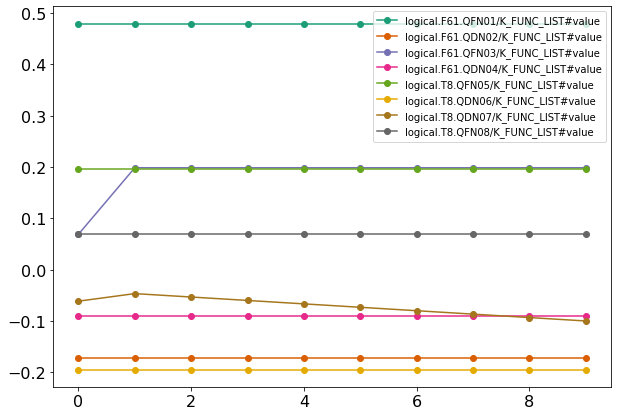

In [182]:
fig, ax = plt.subplots(figsize=(10,7))

for col in list(df.keys())[0:8]:
    ax.plot(list(df[col].index), df[col], marker="o", label=col)
ax.legend(fontsize=10)

In [183]:
df

logical.F61.QFN01/K_FUNC_LIST#value  logical.F61.QDN02/K_FUNC_LIST#value  \
0                              0.47969                             -0.17299   
1                              0.47969                             -0.17299   
2                              0.47969                             -0.17299   
3                              0.47969                             -0.17299   
4                              0.47969                             -0.17299   
5                              0.47969                             -0.17299   
6                              0.47969                             -0.17299   
7                              0.47969                             -0.17299   
8                              0.47969                             -0.17299   
9                              0.47969                             -0.17299   

   logical.F61.QFN03/K_FUNC_LIST#value  logical.F61.QDN04/K_FUNC_LIST#value  \
0                              0.06903                             -0.09035   
1                              0.19864                             -0.09035   
2                              0.19864                             -0.09035   
3                              0.19864                             -0.09035   
4                              0.19864                             -0.09035   
5                              0.19864                             -0.09035   
6                              0.19864                             -0.09035   
7                              0.19864                             -0.09035   
8                              0.19864                             -0.09035   
9                              0.19864                             -0.09035   

   logical.T8.QFN05/K_FUNC_LIST#value  logical.T8.QDN06/K_FUNC_LIST#value  \
0                               0.196                             -0.1946   
1                               0.196                             -0.1946   
2                               0.196                             -0.1946   
3                               0.196                             -0.1946   
4                               0.196                             -0.1946   
5                               0.196                             -0.1946   
6                               0.196                             -0.1946   
7                               0.196                             -0.1946   
8                               0.196                             -0.1946   
9                               0.196                             -0.1946   

   logical.T8.QDN07/K_FUNC_LIST#value  logical.T8.QFN08/K_FUNC_LIST#value  \
0                           -0.061403                            0.069031   
1                           -0.046667                            0.069031   
2                           -0.053333                            0.069031   
3                           -0.060000                            0.069031   
4                           -0.066667                            0.069031   
5                           -0.073333                            0.069031   
6                           -0.080000                            0.069031   
7                           -0.086667                            0.069031   
8                           -0.093333                            0.069031   
9                           -0.100000                            0.069031   

   PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_HCenter  \
0                                        0.065593   
1                                       -0.871917   
2                                       -1.012833   
3                                       -1.055717   
4                                       -0.772240   
5                                       -0.329364   
6                                       -0.034058   
7                                       -0.322902   
8                                       -0.357900   
9                                    

Text(0.5, 0, 'QDN07 [$m^{-2}$]')

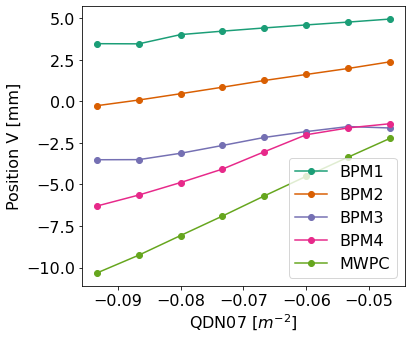

In [189]:
fig, ax = plt.subplots(figsize=(6,5), tight_layout=True)

qfn03 = df["logical.F61.QFN03/K_FUNC_LIST#value"]
qdn04 = df["logical.F61.QDN04/K_FUNC_LIST#value"]
qfn05 = df["logical.T8.QFN05/K_FUNC_LIST#value"]
qdn06 = df["logical.T8.QDN06/K_FUNC_LIST#value"]
qdn07 = df["logical.T8.QDN07/K_FUNC_LIST#value"]
qfn08 = df["logical.T8.QFN08/K_FUNC_LIST#value"]

bpm1H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_HCenter"]
bpm1V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_VCenter"]

bpm2H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions_HCenter"]
bpm2V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions_VCenter"]

bpm3H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions_HCenter"]
bpm3V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions_VCenter"]

bpm4H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions_HCenter"]
bpm4V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions_VCenter"]

mwpcH = df["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions_HCenter"]
mwpcH = df["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions_VCenter"]

ax.plot(qdn07[1:-1], bpm1V[1:-1], marker="o", label="BPM1")
ax.plot(qdn07[1:-1], bpm2V[1:-1], marker="o", label="BPM2")
ax.plot(qdn07[1:-1], bpm3V[1:-1], marker="o", label="BPM3")
ax.plot(qdn07[1:-1], bpm4V[1:-1], marker="o", label="BPM4")
ax.plot(qdn07[1:-1], mwpcH[1:-1], marker="o", label="MWPC")

ax.legend()
ax.set_ylabel("Position V [mm]")
ax.set_xlabel(r"QDN07 [$m^{-2}$]")

Text(0.5, 0, 'QFN08 [$m^{-2}$]')

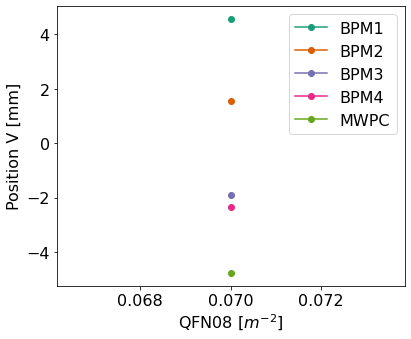

In [177]:
fig, ax = plt.subplots(figsize=(6,5), tight_layout=True)

qfn03 = df["logical.F61.QFN03/K_FUNC_LIST#value"]
qdn04 = df["logical.F61.QDN04/K_FUNC_LIST#value"]
qfn05 = df["logical.T8.QFN05/K_FUNC_LIST#value"]
qdn06 = df["logical.T8.QDN06/K_FUNC_LIST#value"]
qdn07 = df["logical.T8.QDN07/K_FUNC_LIST#value"]
qfn08 = df["logical.T8.QFN08/K_FUNC_LIST#value"]

bpm1H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_HCenter"]
bpm1V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions_VCenter"]

bpm2H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions_HCenter"]
bpm2V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions_VCenter"]

bpm3H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions_HCenter"]
bpm3V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions_VCenter"]

bpm4H = df["PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions_HCenter"]
bpm4V = df["PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions_VCenter"]

mwpcH = df["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions_HCenter"]
mwpcH = df["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions_VCenter"]

ax.plot(qfn08[6], bpm1V[6], marker="o", label="BPM1")
ax.plot(qfn08[6], bpm2V[6], marker="o", label="BPM2")
ax.plot(qfn08[6], bpm3V[6], marker="o", label="BPM3")
ax.plot(qfn08[6], bpm4V[6], marker="o", label="BPM4")
ax.plot(qfn08[6], mwpcH[6], marker="o", label="MWPC")

ax.legend()
ax.set_ylabel("Position V [mm]")
ax.set_xlabel(r"QFN08 [$m^{-2}$]")

In [191]:
print(bpm1V[1])
print(bpm2V[1])
print(bpm3V[1])
print(bpm4V[1])

4.953180373908225
2.3787064613095765
-1.6018876828838202
-1.3464350626204855


Text(0.5, 0, 'QFN08 [$m^{-2}$]')

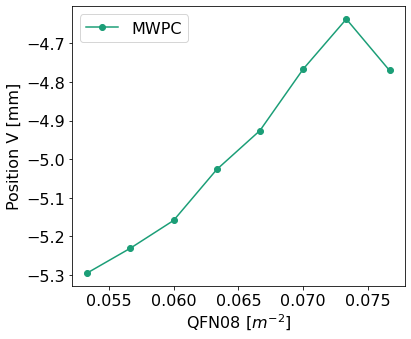

In [129]:
fig, ax = plt.subplots(figsize=(6,5), tight_layout=True)

ax.plot(qfn08[1:-1], mwpcH[1:-1], marker="o", label="MWPC")

ax.legend()
ax.set_ylabel("Position V [mm]")
ax.set_xlabel(r"QFN08 [$m^{-2}$]")

In [127]:
print(round(float(bpm1V[1:2]),3))
print(round(float(bpm2V[1:2]),3))
print(round(float(bpm3V[1:2]),3))
print(round(float(bpm4V[1:2]),3))

4.506
1.392
-2.087
-3.037


In [128]:
print(round(bpm1V[1:-1].median(),3))
print(round(bpm2V[1:-1].median(),3))
print(round(bpm3V[1:-1].median(),3))
print(round(bpm4V[1:-1].median(),3))

4.536
1.472
-1.993
-2.742


# QDN07 beam misalignement

In [130]:
# Measurement
x = qfn08[1:-1]
y = mwpcH[1:-1]/1000
ax.plot(x, y, marker="o", c="b", label="MWPC measurement")

res = stats.linregress(x, y)
ax.plot(x, res.intercept + res.slope*x, c='darkblue', label=f'MAD-X fitted line slope = {round(res.slope,3)}')
slope_meas = res.slope

In [134]:
gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356

# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("/eos/home-e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.str")
madx.call("/eos/home-e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.seq")

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')


madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx.input('SEQEDIT, SEQUENCE=f61t8_op;')
madx.input('FLATTEN;')
madx.input('REMOVE, ELEMENT=ARBMATRIX;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.input("F62.BTV002 : MARKER;")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.command.install(element = 'F62.BTV002', at=1.250107+0.406, from_="F61.MBXHD033")
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.use(sequence="f61t8_op")

# Initial dipole strengths
madx.input("kBHZ1 = -0.044108;")
madx.input("kBHZ2 = 0.045318;")
madx.input("kBHZ3 = 0.022599;")
madx.input("kBHZ4 = -0.03492;")
madx.input("kBHZ5 = -0.038;")

# Initial vertical kicker strengths
# madx.input("kDVT2 = -0.000388;")
# madx.input("kDVT3 = 0.000250;")
madx.input("kDVT2 = 0.0;")
madx.input("kDVT3 = 0.0;")

mwpc_vcenter_madx = []
k_qfn08_list = []

instrument_focal_point = "t08.xwcm103"
for i in range(len(df[1:-1])):
    i +=1
    
    # Computed quad strength with values from 2021-11-12
    madx.input("kQFN1 = "+str(df.iloc[i]["logical.F61.QFN01/K_FUNC_LIST#value"])+";")
    madx.input("kQDN2 = "+str(df.iloc[i]["logical.F61.QDN02/K_FUNC_LIST#value"])+";")
    madx.input("kQFN3 = "+str(df.iloc[i]["logical.F61.QFN03/K_FUNC_LIST#value"])+";")
    madx.input("kQDN4 = "+str(df.iloc[i]["logical.F61.QDN04/K_FUNC_LIST#value"])+";")
    madx.input("kQFN5 = "+str(df.iloc[i]["logical.T8.QFN05/K_FUNC_LIST#value"])+";")
    madx.input("kQDN6 = "+str(df.iloc[i]["logical.T8.QDN06/K_FUNC_LIST#value"])+";")
    madx.input("kQDN7 = "+str(df.iloc[i]["logical.T8.QDN07/K_FUNC_LIST#value"])+";")
    madx.input("kQFN8 = "+str(df.iloc[i]["logical.T8.QFN08/K_FUNC_LIST#value"])+";")
    
    madx.input("Select, flag=error, clear = true;") # Very IMPORTANT, This is because otherwise you will select element previously selected with your pattern
#     madx.select(flag='error', pattern='T08.MQNFK061') # QDN07
    madx.select(flag='error', pattern='T08.MQNFK066') # QFN08

    y_error = 0.0

    madx.input("EALIGN, DY="+str(y_error)+";")

    # Print the EFCOMP we put in for debugging
    madx.input("Select, flag=error, clear = true;")
    madx.input("SELECT, FLAG=ERROR, PATTERN='T08.MQNFK066';")
    madx.input("EPRINT;")
    
    twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
    mwpc_vcenter_madx.append(twiss_f61.y["t08.xwcm103"])
    k_qfn08_list.append(df.iloc[i]["logical.T8.QFN08/K_FUNC_LIST#value"])

# Minimize slope MAD-X to Measurement

In [145]:
from __future__ import print_function
import pybobyqa


gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356

# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("/eos/home-e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.str")
madx.call("/eos/home-e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.seq")

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')


madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx.input('SEQEDIT, SEQUENCE=f61t8_op;')
madx.input('FLATTEN;')
madx.input('REMOVE, ELEMENT=ARBMATRIX;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.input("F62.BTV002 : MARKER;")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.command.install(element = 'F62.BTV002', at=1.250107+0.406, from_="F61.MBXHD033")
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.use(sequence="f61t8_op")

# Initial dipole strengths
madx.input("kBHZ1 = -0.044108;")
madx.input("kBHZ2 = 0.045318;")
madx.input("kBHZ3 = 0.022599;")
madx.input("kBHZ4 = -0.03492;")
madx.input("kBHZ5 = -0.038;")

# Initial vertical kicker strengths
# madx.input("kDVT2 = -0.000388;")
# madx.input("kDVT3 = 0.000250;")
madx.input("kDVT2 = 0.0;")
madx.input("kDVT3 = 0.0;")


# Define the objective function
def obj_function(x):
    
    print (x)
    mwpc_vcenter_madx = []
    k_qfn08_list = []
    instrument_focal_point = "t08.xwcm103"
    for i in range(len(df[1:-1])):
        i +=1

        # Computed quad strength with values from 2021-11-12
        madx.input("kQFN1 = "+str(df.iloc[i]["logical.F61.QFN01/K_FUNC_LIST#value"])+";")
        madx.input("kQDN2 = "+str(df.iloc[i]["logical.F61.QDN02/K_FUNC_LIST#value"])+";")
        madx.input("kQFN3 = "+str(df.iloc[i]["logical.F61.QFN03/K_FUNC_LIST#value"])+";")
        madx.input("kQDN4 = "+str(df.iloc[i]["logical.F61.QDN04/K_FUNC_LIST#value"])+";")
        madx.input("kQFN5 = "+str(df.iloc[i]["logical.T8.QFN05/K_FUNC_LIST#value"])+";")
        madx.input("kQDN6 = "+str(df.iloc[i]["logical.T8.QDN06/K_FUNC_LIST#value"])+";")
        madx.input("kQDN7 = "+str(df.iloc[i]["logical.T8.QDN07/K_FUNC_LIST#value"])+";")
        madx.input("kQFN8 = "+str(df.iloc[i]["logical.T8.QFN08/K_FUNC_LIST#value"])+";")

        madx.input("Select, flag=error, clear = true;") # Very IMPORTANT, This is because otherwise you will select element previously selected with your pattern
        madx.select(flag='error', pattern='T08.MQNFK066')

        y_error = x[0]

        madx.input("EALIGN, DY="+str(y_error)+";")

        # Print the EFCOMP we put in for debugging
        madx.input("Select, flag=error, clear = true;")
        madx.input("SELECT, FLAG=ERROR, PATTERN='T08.MQNFK066';")
        madx.input("EPRINT;")

        twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
        mwpc_vcenter_madx.append(twiss_f61.y["t08.xwcm103"])
        k_qfn08_list.append(df.iloc[i]["logical.T8.QFN08/K_FUNC_LIST#value"])

    x = np.array(k_qfn08_list)
    y = mwpc_vcenter_madx
    res = stats.linregress(x, y)
    slope_madx = res.slope
    goal = abs(slope_meas - slope_madx)
    print(goal)
    return goal

# Define the starting point
x0 = np.array([0.0])

# Bounds
lower = np.array([-0.01])
upper = np.array([0.01])

# Call Py-BOBYQA
soln = pybobyqa.solve(obj_function, x0, bounds=(lower,upper), rhobeg=0.005)

# Display output
print(soln)

[0.]
0.028278671464079502
[0.005]
0.4257582117695913
[-0.005]
0.3692008688414322
[-0.00019149]
0.013056343616822367
[-0.00095743]
0.047832967772206164
[-0.00040043]
0.003554203538912906
[-0.00045613]
0.007982079962242213
[-0.00031685]
0.0030900153233811914
[-0.00035341]
0.0001837239072728751
[-0.00037076]
0.0011948659396493547
[-0.00035068]
0.0004009372800613045
[-0.00035591]
1.5015862879875358e-05
[-0.00035813]
0.00019104863072491943
[-0.00035539]
2.6579451414224242e-05
[-0.00035595]
1.788838571658083e-05
[-0.00035588]
1.2205258096524563e-05
[-0.00035574]
9.628389632289347e-07
[-0.0003557]
2.094058096764606e-06
[-0.00035577]
3.7170680009732116e-06
[-0.00035573]
2.1918922170349742e-07
[-0.00035573]
3.632815582001181e-07
****** Py-BOBYQA Results ******
Solution xmin = [-0.00035573]
Objective value f(xmin) = 2.191892217e-07
Needed 21 objective evaluations (at 21 points)
Approximate gradient = [7.13759677]
Approximate Hessian = [[3.93782036e+09]]
Exit flag = 0
Success: rho has reached rho

In [148]:
soln.x

array([-0.00035573])

In [149]:
mwpc_vcenter_madx = []
k_qdn07_list = []
instrument_focal_point = "t08.xwcm103"
for i in range(len(df[1:-1])):
    i +=1

    # Computed quad strength with values from 2021-11-12
    madx.input("kQFN1 = "+str(df.iloc[i]["logical.F61.QFN01/K_FUNC_LIST#value"])+";")
    madx.input("kQDN2 = "+str(df.iloc[i]["logical.F61.QDN02/K_FUNC_LIST#value"])+";")
    madx.input("kQFN3 = "+str(df.iloc[i]["logical.F61.QFN03/K_FUNC_LIST#value"])+";")
    madx.input("kQDN4 = "+str(df.iloc[i]["logical.F61.QDN04/K_FUNC_LIST#value"])+";")
    madx.input("kQFN5 = "+str(df.iloc[i]["logical.T8.QFN05/K_FUNC_LIST#value"])+";")
    madx.input("kQDN6 = "+str(df.iloc[i]["logical.T8.QDN06/K_FUNC_LIST#value"])+";")
    madx.input("kQDN7 = "+str(df.iloc[i]["logical.T8.QDN07/K_FUNC_LIST#value"])+";")
    madx.input("kQFN8 = "+str(df.iloc[i]["logical.T8.QFN08/K_FUNC_LIST#value"])+";")

    madx.input("Select, flag=error, clear = true;") # Very IMPORTANT, This is because otherwise you will select element previously selected with your pattern
    madx.select(flag='error', pattern='T08.MQNFK066')

    y_error = soln.x[0]

    madx.input("EALIGN, DY="+str(y_error)+";")

    # Print the EFCOMP we put in for debugging
    madx.input("Select, flag=error, clear = true;")
    madx.input("SELECT, FLAG=ERROR, PATTERN='T08.MQNFK066';")
    madx.input("EPRINT;")

    twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
    mwpc_vcenter_madx.append(twiss_f61.y["t08.xwcm103"])
    k_qdn07_list.append(df.iloc[i]["logical.T8.QFN08/K_FUNC_LIST#value"])

Text(0.5, 1.0, 'Without vertical correctors')

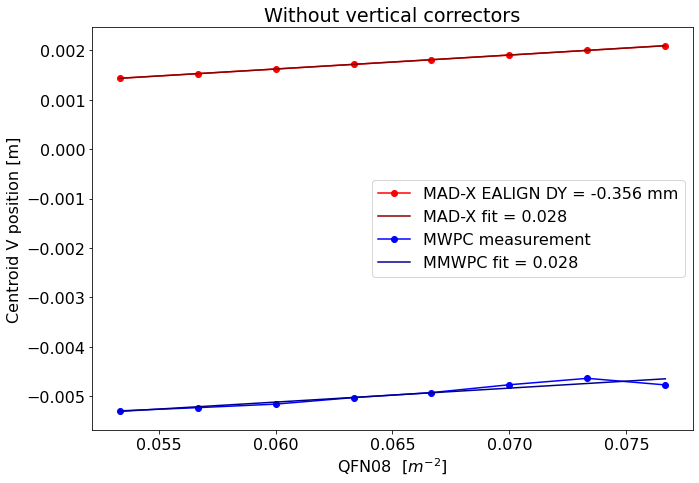

In [150]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,7))

# MAD-X
x = np.array(k_qfn08_list)
y = mwpc_vcenter_madx
ax.plot(x, y, label=f"MAD-X EALIGN DY = {round(y_error*1000,3)} mm", marker="o", c="red")

res = stats.linregress(x, y)
ax.plot(x, res.intercept + res.slope*x, c='darkred', label=f'MAD-X fit = {round(res.slope,3)}')
slope_madx = res.slope

# Measurement
x = qfn08[1:-1]
y = mwpcH[1:-1]/1000
ax.plot(x, y, marker="o", c="b", label="MWPC measurement")

res = stats.linregress(x, y)
ax.plot(x, res.intercept + res.slope*x, c='darkblue', label=f'MMWPC fit = {round(res.slope,3)}')
slope_meas = res.slope
        
ax.legend()
ax.set_ylabel("Centroid V position [m]")
ax.set_xlabel("QFN08  [$m^{-2}$]")
ax.set_title("Without vertical correctors")